# Análisis Exploratorio de Datos (EDA)

## 0. Introducción

### Contexto
Un Análisis Exploratorio de Datos (EDA) es una etapa fundamental en cualquier estudio cuantitativo, ya que permite comprender mejor un conjunto de datos, identificar patrones relevantes, detectar anomalías, verificar suposiciones y obtener una visión general de las principales características del fenómeno estudiado.

<img src='Imagen-Intro.png' />

En este caso, realizamos un EDA comparativo entre tres activos financieros de gran relevancia global: el índice S&P 500, el Oro y Bitcoin. El propósito es examinar cómo se comportan estos instrumentos a lo largo del tiempo, especialmente en términos de:

- Rendimiento mensual
- Fecha
- Volumen operado
- Volatilidad

Estos elementos permiten evaluar no solo la dinámica individual de cada activo, sino también su relación, sus diferencias estructurales y su posible papel como activos complementarios dentro de una estrategia de inversión.

### Datos SP500, Oro y Bitcoin

El conjunto de datos utilizado recopila información financiera histórica del S&P 500 (uno de los principales índices bursátiles del mundo), del Oro (considerado un activo refugio) y de Bitcoin (el principal criptoactivo). La combinación de estos tres instrumentos resulta especialmente interesante, ya que representan tres clases de activos muy diferentes: renta variable, commodities y criptomonedas. Esto permite estudiar contrastes en comportamientos, ciclos, riesgos, correlaciones y oportunidades de diversificación.

Cada activo cuenta con las siguientes variables:

  1. Fecha: seguimiento histórico mes a mes.
  2. Rendimiento mensual: variación porcentual del precio respecto al mes anterior.
  3. Volumen: cantidad operada.
  4. Volatilidad: medida del riesgo o variabilidad del precio en el periodo.

### Alcance del Análisis y Objetivos

El objetivo principal de este análisis exploratorio es comprender cómo se comportan el S&P 500, el Oro y Bitcoin de manera individual y comparada, identificando patrones relevantes como:

  1. Relaciones y correlaciones entre ambos activos.
  2. Diferencias en niveles de riesgo y volatilidad.
  3. Comportamientos ante ciclos económicos.
  4. Potenciales ventajas de diversificación.

El EDA ofrecerá una base sólida para posteriores análisis, como modelado estadístico, predicciones, optimización de portafolios o estudios comparativos más avanzados.

## 1. Carga y Preparación de Datos

### 1.1. Importación de Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1.2 Ajustes Iniciales

In [2]:
# Gráficos en el mismo cuaderno
%matplotlib inline

# Estilo de Seabron
sns.set_style("ticks")

# Configuración de rejilla y marco
plt.rcParams.update({
    "axes.grid": True,               # activa la rejilla por defecto
    "grid.linestyle": "-",           # tipo de línea de la grid
    "grid.linewidth": 0.4,           # grosor fino
    "grid.alpha": 0.6,               # transparencia de la grid
    "axes.edgecolor": "black",       # color del marco
    "axes.linewidth": 1.1            # grosor del marco
})

## 2. Carga y Preparación de Datos

### 2.1. Lectura de Datos

In [3]:
df = pd.read_csv("Assets.csv", sep=';')
df

,Date,Month,Volatility%,Momentum,Volumen,Asset
0,01/01/2021,ene,8.26,-3.39,225930,Gold
1,01/02/2021,feb,8.20,-7.42,16813,Gold
2,01/03/2021,mar,4.41,-1.34,167914,Gold
3,01/04/2021,abr,5.16,3.54,11366,Gold
4,01/05/2021,may,7.30,6.37,210133,Gold
...,...,...,...,...,...,...
175,01/08/2025,ago,14.70,-6.48,204838,Bitcoin
176,01/09/2025,sep,9.83,5.38,145042,Bitcoin
177,01/10/2025,oct,19.81,-3.95,222503,Bitcoin
178,01/11/2025,nov,27.85,-21.31,168949,Bitcoin


### 2.2. Preparación

In [4]:
#Renombramos las variablesara falicitar su uso
df.rename({'Momentum':'Rend',
           'Volatility%':'Dist_Max_Min',
           'Asset':'Activo', 
           'Month':'Mes'},
          axis=1, inplace=True)

## 3. Limpieza de Datos

In [5]:
df.drop('Date', axis=1, inplace=True)
df.head(5)

,Mes,Dist_Max_Min,Rend,Volumen,Activo
0,ene,8.26,-3.39,225930,Gold
1,feb,8.20,-7.42,16813,Gold
2,mar,4.41,-1.34,167914,Gold
3,abr,5.16,3.54,11366,Gold
4,may,7.30,6.37,210133,Gold


## 4. Análisis Descriptivo

In [6]:
df.head(10)

,Mes,Dist_Max_Min,Rend,Volumen,Activo
0,ene,8.26,-3.39,225930,Gold
1,feb,8.20,-7.42,16813,Gold
2,mar,4.41,-1.34,167914,Gold
3,abr,5.16,3.54,11366,Gold
4,may,7.30,6.37,210133,Gold
5,jun,8.61,-7.05,8466,Gold
6,jul,3.62,2.08,245814,Gold
7,ago,5.21,-2.74,11080,Gold
8,sep,6.20,-3.21,28543,Gold
9,oct,3.67,1.64,8208,Gold


#### 4.1. Dimensiones del Dataset

In [7]:
df.shape

(180, 5)

#### 4.2. Información General del Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mes           180 non-null    object 
 1   Dist_Max_Min  180 non-null    float64
 2   Rend          180 non-null    float64
 3   Volumen       180 non-null    int64  
 4   Activo        180 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Dist_Max_Min,Rend,Volumen
count,180.000000,180.000000,180.000000
mean,13.695889,2.049222,97604.944444
std,12.603195,11.168445,61819.113417
min,2.940000,-37.770000,4495.000000
25%,5.455000,-2.680000,68607.750000
50%,8.215000,1.925000,88326.000000
75%,18.835000,5.267500,119530.250000
max,78.350000,47.710000,307970.000000


#### 4.3. Recuento de Datos

In [10]:
df['Activo'].value_counts()

Activo
Gold       60
SP500      60
Bitcoin    60
Name: count, dtype: int64

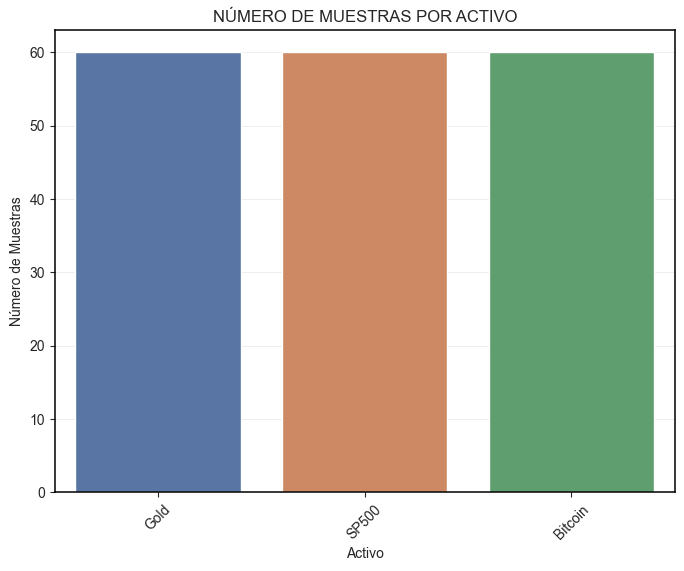

In [11]:
# Creación de gráfico de barras
counts =  df['Activo'].value_counts()
# Creación de gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Activo', hue='Activo', palette='deep', legend=False)
plt.ylabel('Número de Muestras')
plt.title('NÚMERO DE MUESTRAS POR ACTIVO')
plt.xticks(rotation=45)
plt.show()

### 4.4. Comprobación de Variables Nulas

In [12]:
df.isnull().sum(axis=0)

Mes             0
Dist_Max_Min    0
Rend            0
Volumen         0
Activo          0
dtype: int64

## 5. Exploración Univariante de Datos

### 5.1. Volatilidad

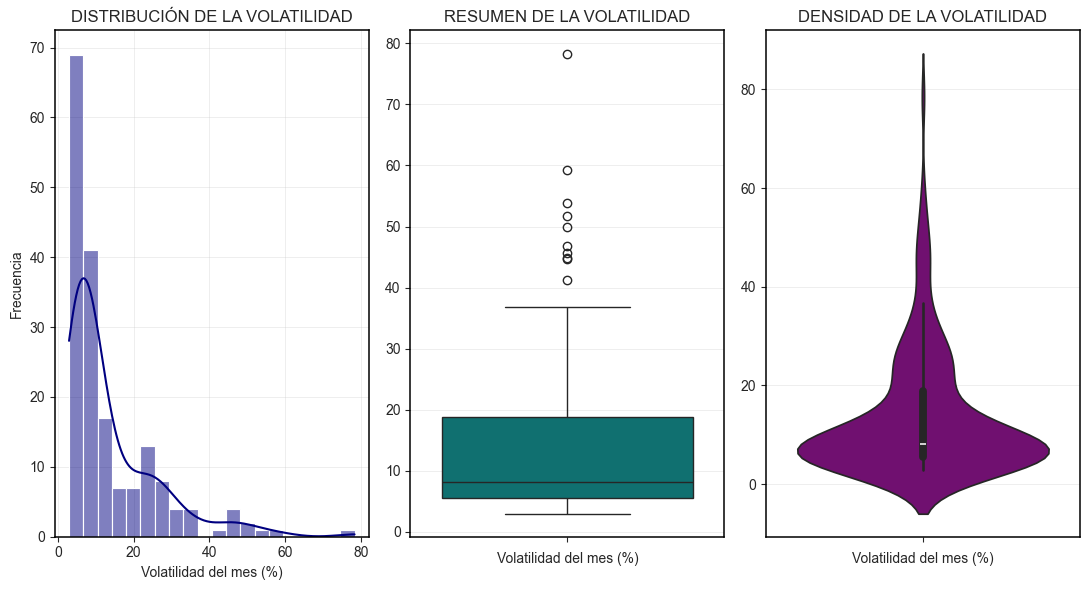

In [13]:
# 1. Creación lienzo
plt.figure(figsize=(11, 6))

# 1. Histograma con KDE
plt.subplot(1, 3, 1)
sns.histplot(df['Dist_Max_Min'], kde=True, bins=20, color='navy')
plt.title('DISTRIBUCIÓN DE LA VOLATILIDAD')
plt.xlabel('Volatilidad del mes (%)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Dist_Max_Min'], color='teal')
plt.title('RESUMEN DE LA VOLATILIDAD')
plt.xlabel('Volatilidad del mes (%)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['Dist_Max_Min'], color='purple')
plt.title('DENSIDAD DE LA VOLATILIDAD')
plt.xlabel('Volatilidad del mes (%)')
plt.ylabel('')

# Mostrar gráficos
plt.tight_layout()
plt.show()

### 5.2. Rendimiento

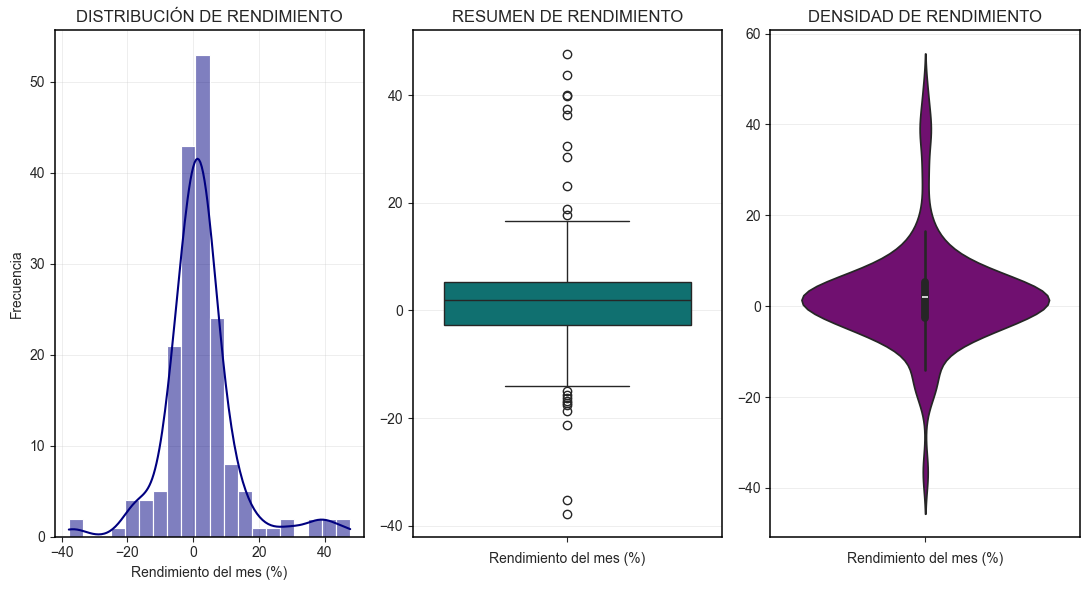

In [14]:
# 1. Creación lienzo
plt.figure(figsize=(11, 6))

# 1. Histograma con KDE
plt.subplot(1, 3, 1)
sns.histplot(df['Rend'], kde=True, bins=20, color='navy')
plt.title('DISTRIBUCIÓN DE RENDIMIENTO')
plt.xlabel('Rendimiento del mes (%)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Rend'], color='teal')
plt.title('RESUMEN DE RENDIMIENTO')
plt.xlabel('Rendimiento del mes (%)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['Rend'], color='purple')
plt.title('DENSIDAD DE RENDIMIENTO')
plt.xlabel('Rendimiento del mes (%)')
plt.ylabel('')

# Mostrar gráficos
plt.tight_layout()
plt.show()

### 5.3. Volumen

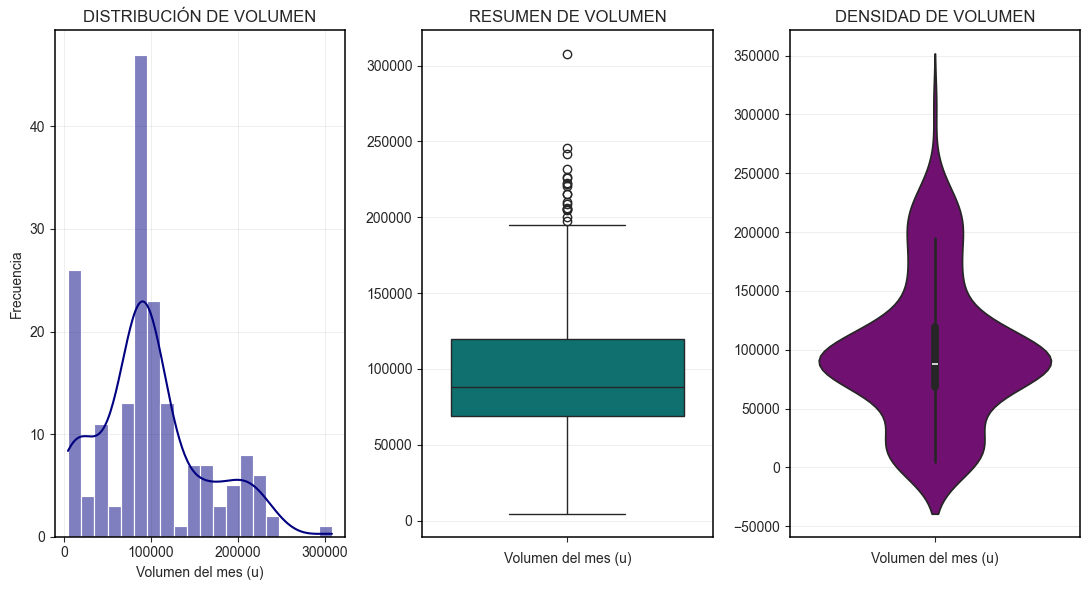

In [15]:
# 1. Creación lienzo
plt.figure(figsize=(11, 6))

# 1. Histograma con KDE
plt.subplot(1, 3, 1)
sns.histplot(df['Volumen'], kde=True, bins=20, color='navy')
plt.title('DISTRIBUCIÓN DE VOLUMEN')
plt.xlabel('Volumen del mes (u)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Volumen'], color='teal')
plt.title('RESUMEN DE VOLUMEN')
plt.xlabel('Volumen del mes (u)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['Volumen'], color='purple')
plt.title('DENSIDAD DE VOLUMEN')
plt.xlabel('Volumen del mes (u)')
plt.ylabel('')

# Mostrar gráficos
plt.tight_layout()
plt.show()

## 6. Exploración Multivariante de Datos

### 6.1. Rendimiento y Volumen

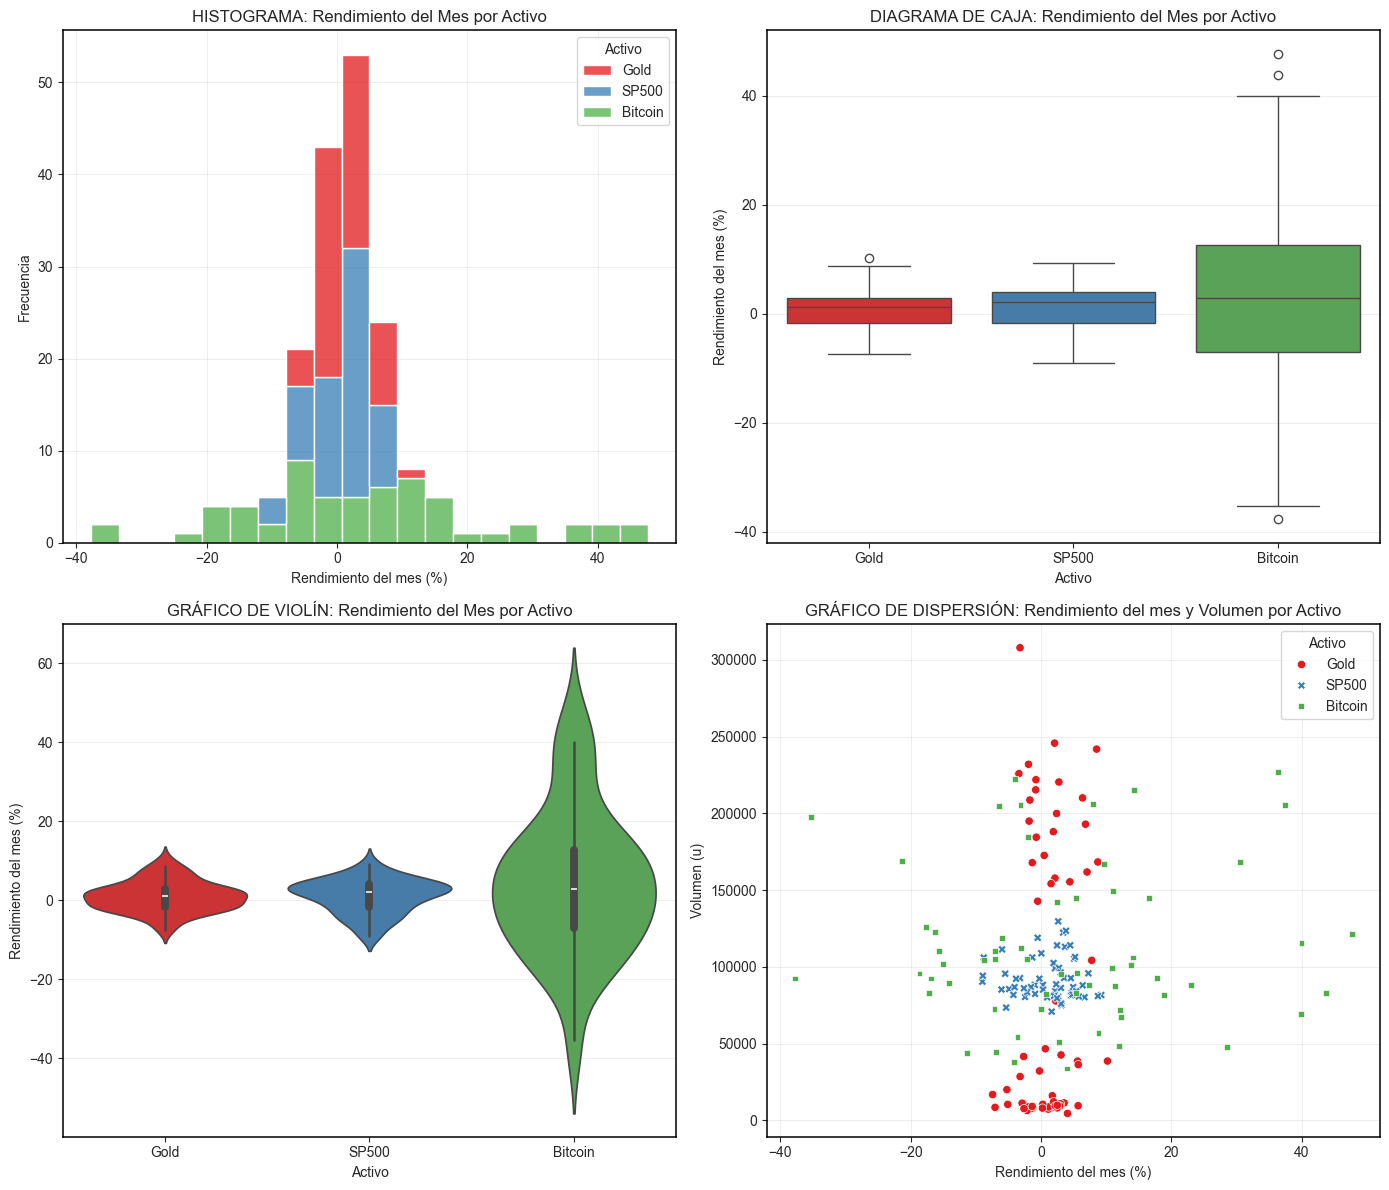

In [16]:
# Creación lienzo con cuadrícula 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Rendimiento por Activo
sns.histplot(data=df, x='Rend', hue='Activo', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('HISTOGRAMA: Rendimiento del Mes por Activo')
axs[0, 0].set_xlabel('Rendimiento del mes (%)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Rendimiento por Activo
sns.boxplot(data=df, x='Activo', y='Rend', hue='Activo', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('DIAGRAMA DE CAJA: Rendimiento del Mes por Activo')
axs[0, 1].set_xlabel('Activo')
axs[0, 1].set_ylabel('Rendimiento del mes (%)')

# 3. Gráfico de Violín (Violin) de Rendimiento por Activo
sns.violinplot(data=df, x='Activo', y='Rend', hue='Activo', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('GRÁFICO DE VIOLÍN: Rendimiento del Mes por Activo')
axs[1, 0].set_xlabel('Activo')
axs[1, 0].set_ylabel('Rendimiento del mes (%)')

# 4. Gráfico de Dispersión (Scatter Plot) de Rendimiento por Activo
sns.scatterplot(data=df, x='Rend', y='Volumen', hue='Activo', palette='Set1', style='Activo', ax=axs[1, 1])
axs[1, 1].set_title('GRÁFICO DE DISPERSIÓN: Rendimiento del mes y Volumen por Activo')
axs[1, 1].set_xlabel('Rendimiento del mes (%)')
axs[1, 1].set_ylabel('Volumen (u)')
axs[1, 1].legend(title='Activo')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.2. Rendimiento y Mes

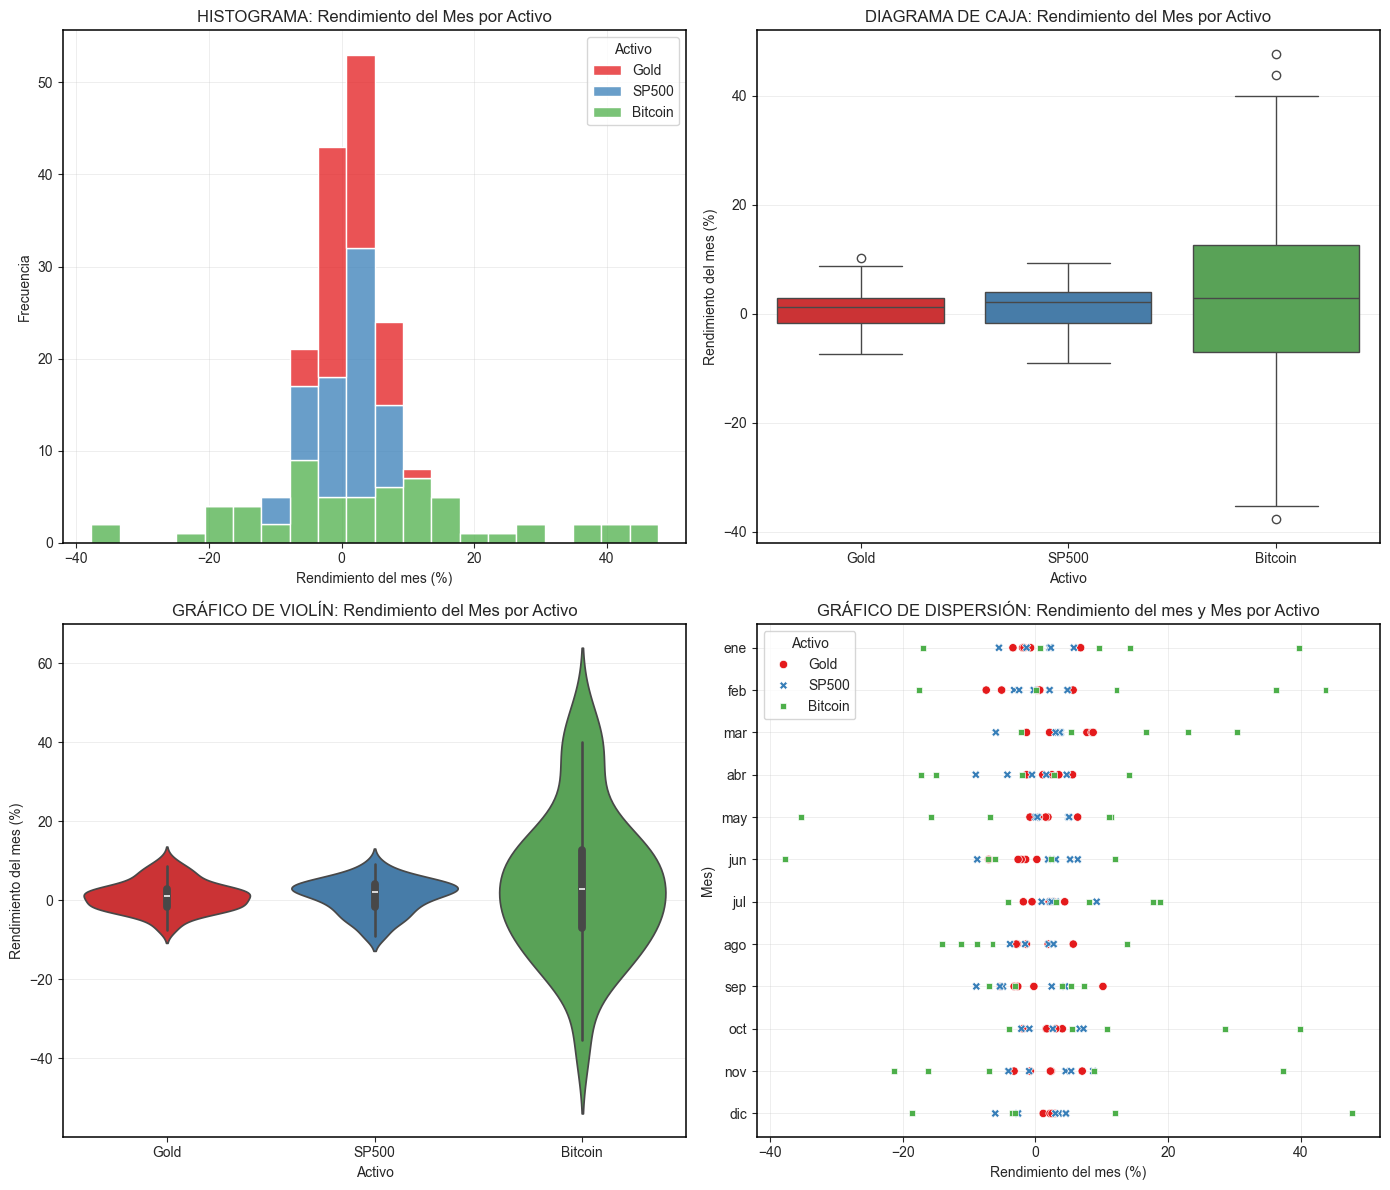

In [17]:
# Creación lienzo con cuadrícula 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Rendimiento por Activo
sns.histplot(data=df, x='Rend', hue='Activo', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('HISTOGRAMA: Rendimiento del Mes por Activo')
axs[0, 0].set_xlabel('Rendimiento del mes (%)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Rendimiento por Activo
sns.boxplot(data=df, x='Activo', y='Rend', hue='Activo', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('DIAGRAMA DE CAJA: Rendimiento del Mes por Activo')
axs[0, 1].set_xlabel('Activo')
axs[0, 1].set_ylabel('Rendimiento del mes (%)')

# 3. Gráfico de Violín (Violin) de Rendimiento por Activo
sns.violinplot(data=df, x='Activo', y='Rend', hue='Activo', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('GRÁFICO DE VIOLÍN: Rendimiento del Mes por Activo')
axs[1, 0].set_xlabel('Activo')
axs[1, 0].set_ylabel('Rendimiento del mes (%)')

# 4. Gráfico de Dispersión (Scatter Plot) de Rendimiento por Activo
sns.scatterplot(data=df, x='Rend', y='Mes', hue='Activo', palette='Set1', style='Activo', ax=axs[1, 1])
axs[1, 1].set_title('GRÁFICO DE DISPERSIÓN: Rendimiento del mes y Mes por Activo')
axs[1, 1].set_xlabel('Rendimiento del mes (%)')
axs[1, 1].set_ylabel('Mes)')
axs[1, 1].legend(title='Activo')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.3. Rendimiento y Volatilidad

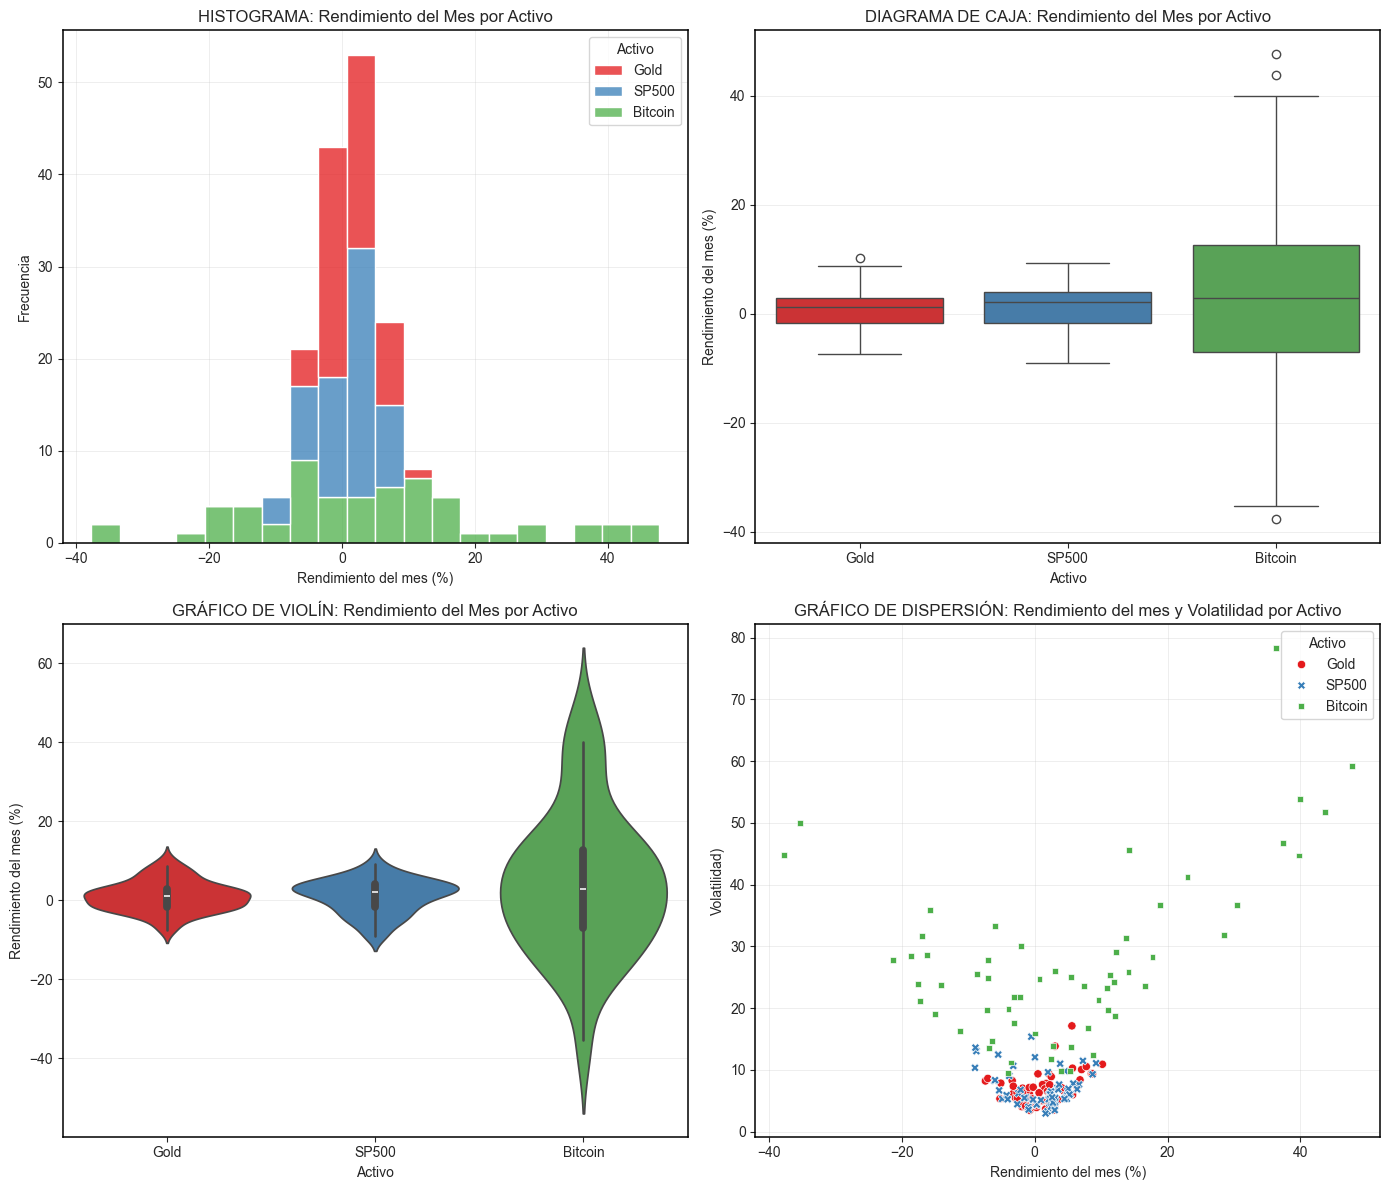

In [18]:
# Creación lienzo con cuadrícula 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Rendimiento por Activo
sns.histplot(data=df, x='Rend', hue='Activo', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('HISTOGRAMA: Rendimiento del Mes por Activo')
axs[0, 0].set_xlabel('Rendimiento del mes (%)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Rendimiento por Activo
sns.boxplot(data=df, x='Activo', y='Rend', hue='Activo', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('DIAGRAMA DE CAJA: Rendimiento del Mes por Activo')
axs[0, 1].set_xlabel('Activo')
axs[0, 1].set_ylabel('Rendimiento del mes (%)')

# 3. Gráfico de Violín (Violin) de Rendimiento por Activo
sns.violinplot(data=df, x='Activo', y='Rend', hue='Activo', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('GRÁFICO DE VIOLÍN: Rendimiento del Mes por Activo')
axs[1, 0].set_xlabel('Activo')
axs[1, 0].set_ylabel('Rendimiento del mes (%)')

# 4. Gráfico de Dispersión (Scatter Plot) de Rendimiento por Activo
sns.scatterplot(data=df, x='Rend', y='Dist_Max_Min', hue='Activo', palette='Set1', style='Activo', ax=axs[1, 1])
axs[1, 1].set_title('GRÁFICO DE DISPERSIÓN: Rendimiento del mes y Volatilidad por Activo')
axs[1, 1].set_xlabel('Rendimiento del mes (%)')
axs[1, 1].set_ylabel('Volatilidad)')
axs[1, 1].legend(title='Activo')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.4. Relación entre todas las variables

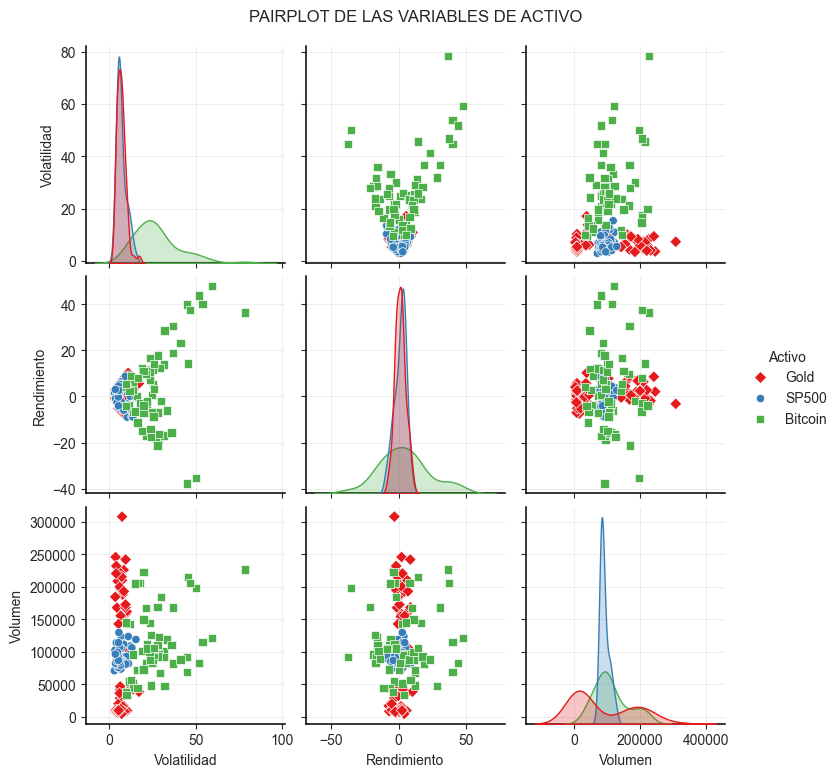

In [19]:
reemplazos = {
    "Rend": "Rendimiento",
    "Dist_Max_Min": "Volatilidad"
}

g = sns.pairplot(df, hue='Activo', markers=["D", "o", "s"], palette="Set1")
plt.suptitle('PAIRPLOT DE LAS VARIABLES DE ACTIVO', y=1.03)

for ax in g.axes.flatten():
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    
    if xlabel in reemplazos:
        ax.set_xlabel(reemplazos[xlabel])
    if ylabel in reemplazos:
        ax.set_ylabel(reemplazos[ylabel])

plt.show()

### 6.5. Correlacion entre variables

In [20]:
meses = {"ene":1, "feb":2, "mar":3, "abr":4, "may":5, "jun":6, "jul":7, "ago":8, "sep":9, "oct":10, "nov":11, "dic":12}
df['Mes_num'] = df['Mes'].map(meses)
print(df[['Mes', 'Mes_num']].head(10))

   Mes  Mes_num
0  ene        1
1  feb        2
2  mar        3
3  abr        4
4  may        5
5  jun        6
6  jul        7
7  ago        8
8  sep        9
9  oct       10


In [21]:
df_num = df.select_dtypes(include='number')
correlation_matrix = df_num.corr()
print(correlation_matrix)

              Dist_Max_Min      Rend   Volumen   Mes_num
Dist_Max_Min      1.000000  0.355215  0.231203 -0.089366
Rend              0.355215  1.000000  0.063124 -0.025248
Volumen           0.231203  0.063124  1.000000 -0.143957
Mes_num          -0.089366 -0.025248 -0.143957  1.000000


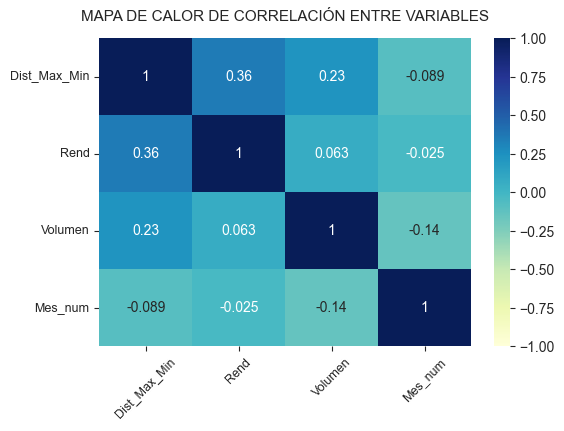

In [22]:
# Heatmap de la correlación entre variables
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('MAPA DE CALOR DE CORRELACIÓN ENTRE VARIABLES', fontsize=11, y=1.03)
plt.yticks(rotation=0, fontsize=9)
plt.xticks(rotation=45, fontsize=9)
plt.show()

## 7. Conclusiones

El estudio comparativo entre el S&P 500, el Oro y Bitcoin revela diferencias significativas en su comportamiento, nivel de riesgo y relación entre sí. Estas conclusiones permiten comprender mejor su papel dentro de un portafolio diversificado.

### Diferencias claras en volatilidad y riesgo

  1. Bitcoin presenta la mayor volatilidad con diferencia. Sus variaciones mensuales suelen ser muy superiores a las del S&P 500 y del Oro.
  2. El S&P 500 muestra una volatilidad moderada y su comportamiento tiende a ser mucho más estable que el de Bitcoin.
  3. El Oro es el activo más estable del conjunto, con menor dispersión en rendimientos.

### Rendimientos

  1. A pesar de la mayor volatilidad de Bitcoin frente al S&P 500 y el Oro, los rendimientos medios de los tres activos resultan sorprendentemente similares. Esto resalta que, aunque Bitcoin ofrece un mayor potencial de ganancias a corto plazo, también conlleva un riesgo significativamente superior, sin embargo, en los últimos cinco años, su rendimiento mensual promedio se ha mantenido solo ligeramente superior comparandolo al de los otros activos.
  2. Al analizar los resultados por mes, se observa que ciertos períodos tienden, estadísticamente, a presentar rendimientos positivos con mayor frecuencia, mientras que otros muestran rendimientos negativos con mayor regularidad. Esto indica la presencia de efectos estacionales, siendo meses como marzo y octubre generalmente positivos, y meses como agosto, por lo general, negativos.

### Conclusión general

El análisis comparativo evidencia que, aunque S&P 500, Oro y Bitcoin presentan niveles de riesgo y volatilidad distintos, sus rendimientos promedio a lo largo de los ultimos 5 años han sido relativamente similares. Bitcoin aporta potencial de crecimiento a corto plazo pero con alta volatilidad y riesgo, el S&P 500 combina estabilidad y rendimiento moderado, y el Oro actúa como refugio más seguro con menos rendimeinto. Por tanto, la selección y combinación de estos instrumentos debe considerar tanto el apetito por riesgo como los objetivos de inversión, destacando la importancia de la diversificación para equilibrar riesgo y rendimiento.
